In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ticktack
from jax import jit
import jax.numpy as jnp
from ticktack import fitting, resample
from scipy.interpolate import interp1d
plt.rcParams['figure.figsize'] = (8.0, 6.0)
#from helper import run_resample, load_IntCal20
import pandas as pd
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d

In [5]:
data = pd.read_csv("Miyahara.csv")

In [6]:
resampler = resample.Resampler()
resampler.load_data(data.year, data.d14c, data.sig_d14c)
resampler.annual = np.arange(np.ceil(resampler.start), np.floor(resampler.end + 1))
new_signal = resampler.signal_resample()

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [12]:
f = interp1d(resampler.x, resampler.y, kind="cubic")
interpolation = f(resampler.annual)
sig = resampler.bandpass_super_gaussian(interpolation, l=1./9.677, sz=0.05, order=30)

[1510. 1511. 1512. 1513. 1514. 1515. 1516. 1517. 1518. 1519. 1520. 1521.
 1522. 1523. 1524. 1525. 1526. 1527. 1528. 1529. 1530. 1531. 1532. 1533.
 1534. 1535. 1536. 1537. 1538. 1539. 1540. 1541. 1542. 1543. 1544. 1545.
 1546. 1547. 1548. 1549. 1550. 1551. 1552. 1553. 1554. 1555. 1556. 1557.
 1558. 1559. 1560. 1561. 1562. 1563. 1564. 1565. 1566. 1567. 1568. 1569.
 1570. 1571. 1572. 1573. 1574. 1575. 1576. 1577. 1578. 1579. 1580. 1581.
 1582. 1583. 1584. 1585. 1586. 1587. 1588. 1589. 1590. 1591. 1592. 1593.
 1594. 1595. 1596. 1597. 1598. 1599. 1600. 1601. 1602. 1603. 1604. 1605.
 1606. 1607. 1608. 1609. 1610.]
[ 8.5         6.9        10.         10.5        10.          8.5
  9.2        11.6         9.20698824  6.4         8.5        11.
  9.1        10.2        10.         10.6        12.4        11.5
 12.6        12.8        11.5        14.3        14.5        12.3
 11.1        12.4        11.4        15.6        12.3        12.5
 10.         12.1        10.         10.2         8.6  

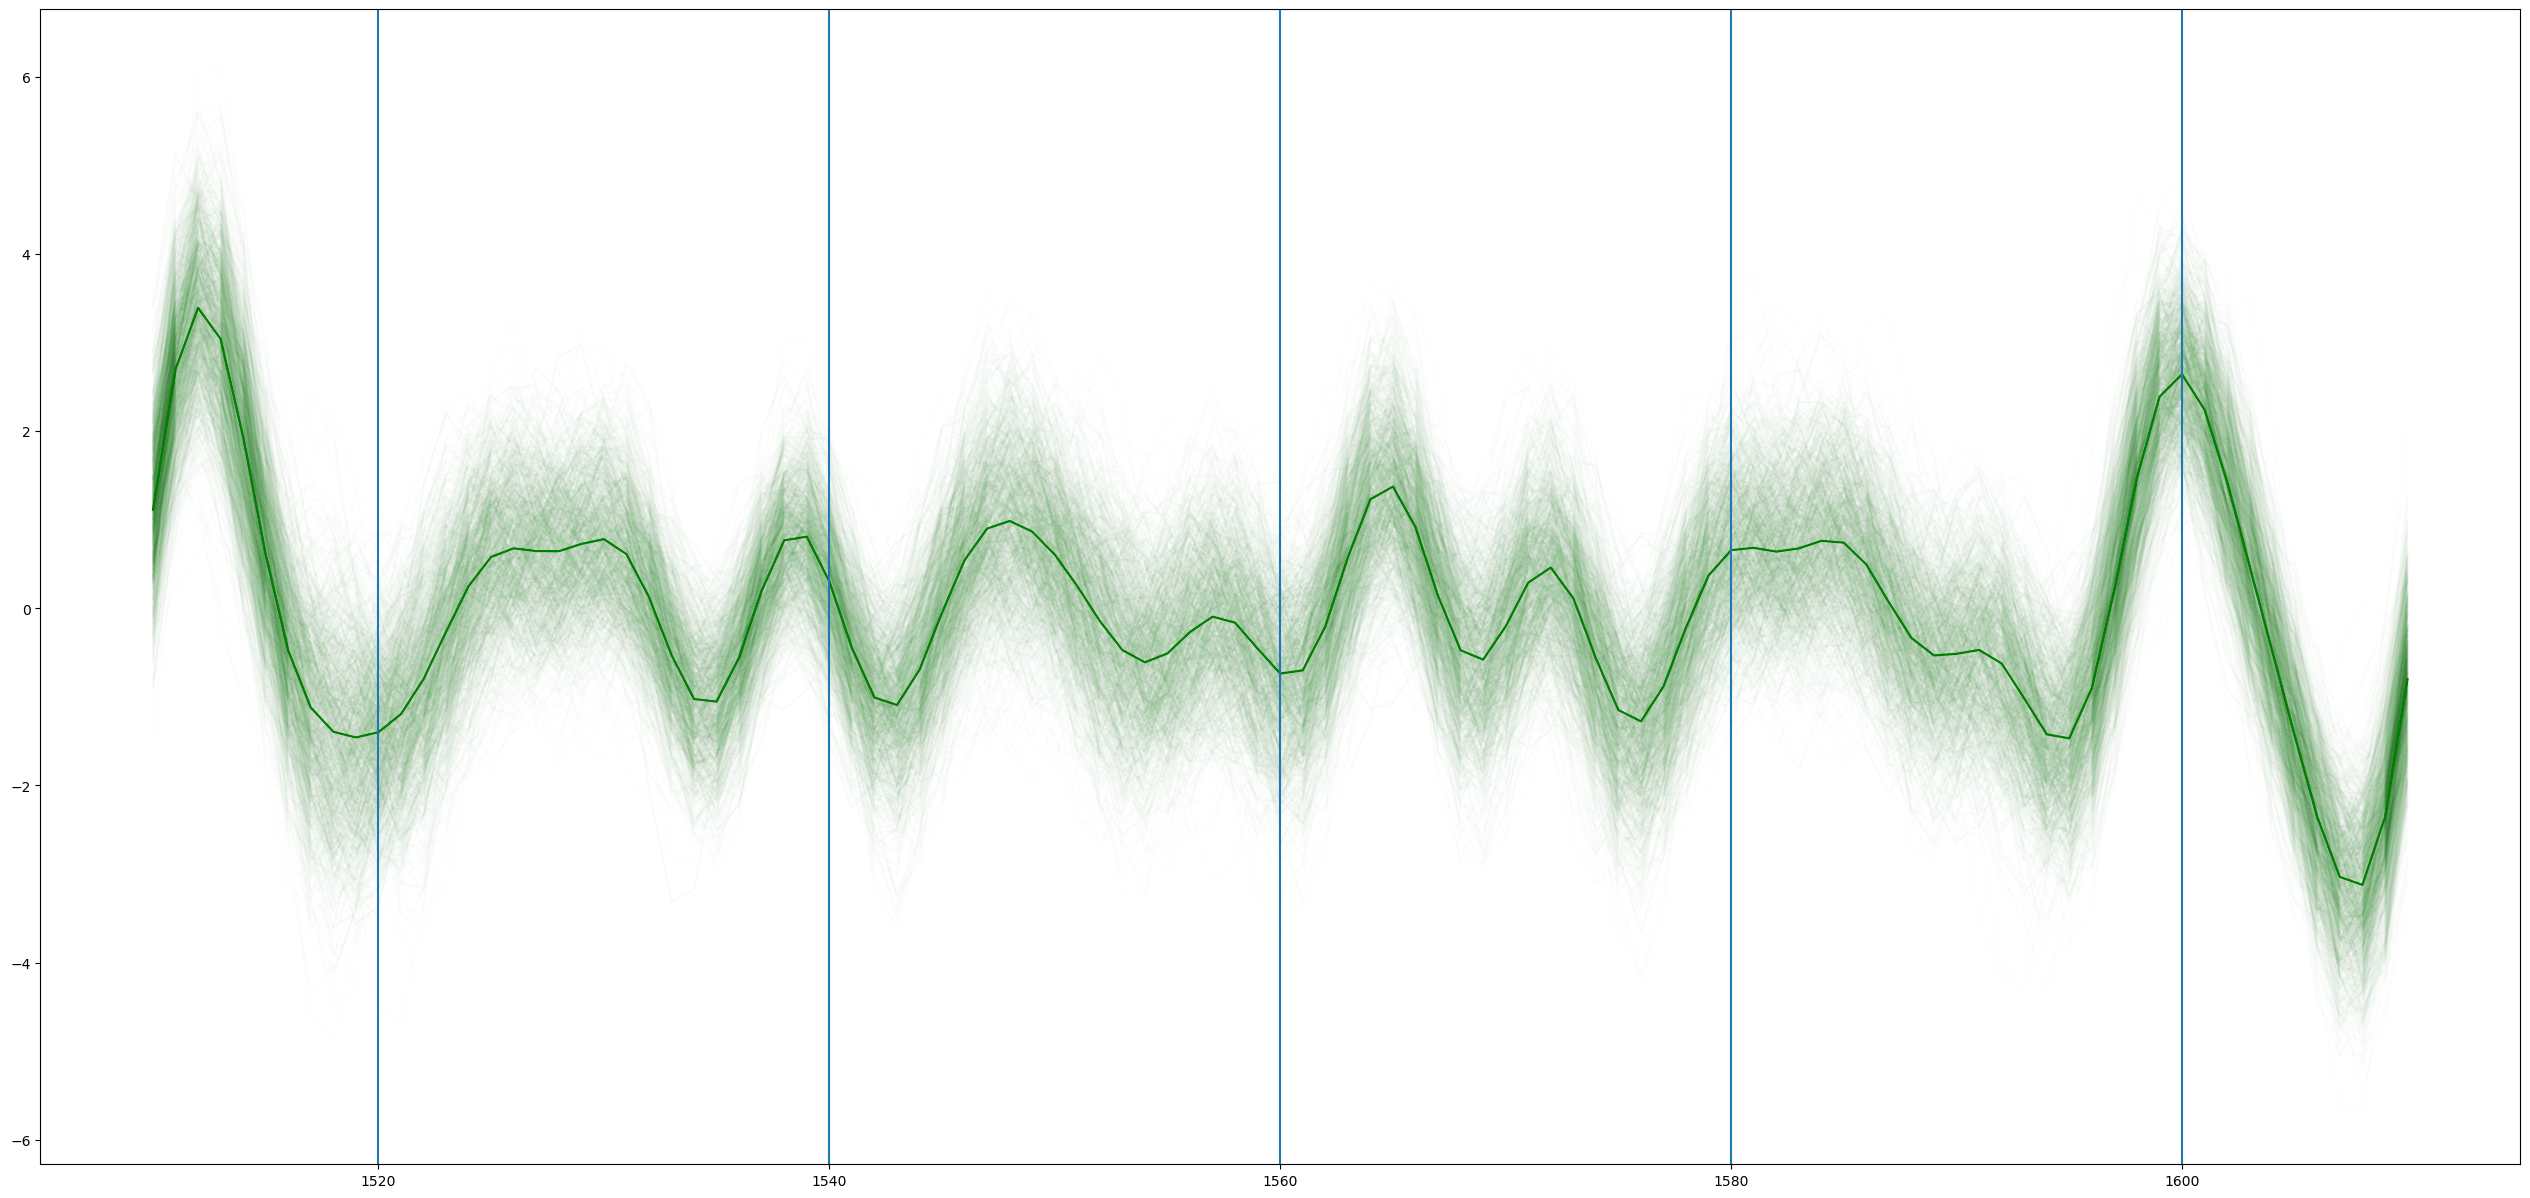

In [8]:
fig, axs = plt.subplots(1, figsize=(32, 15), sharex=True)
axs.plot(resampler.annual, sig, color="g")
for i in np.random.randint(10000, size=1000):
    axs.plot(resampler.annual, new_signal[i, :], color="g", alpha=0.01)
axs.axvline(1520)
axs.axvline(1540)
axs.axvline(1560)
axs.axvline(1580)
axs.axvline(1600)

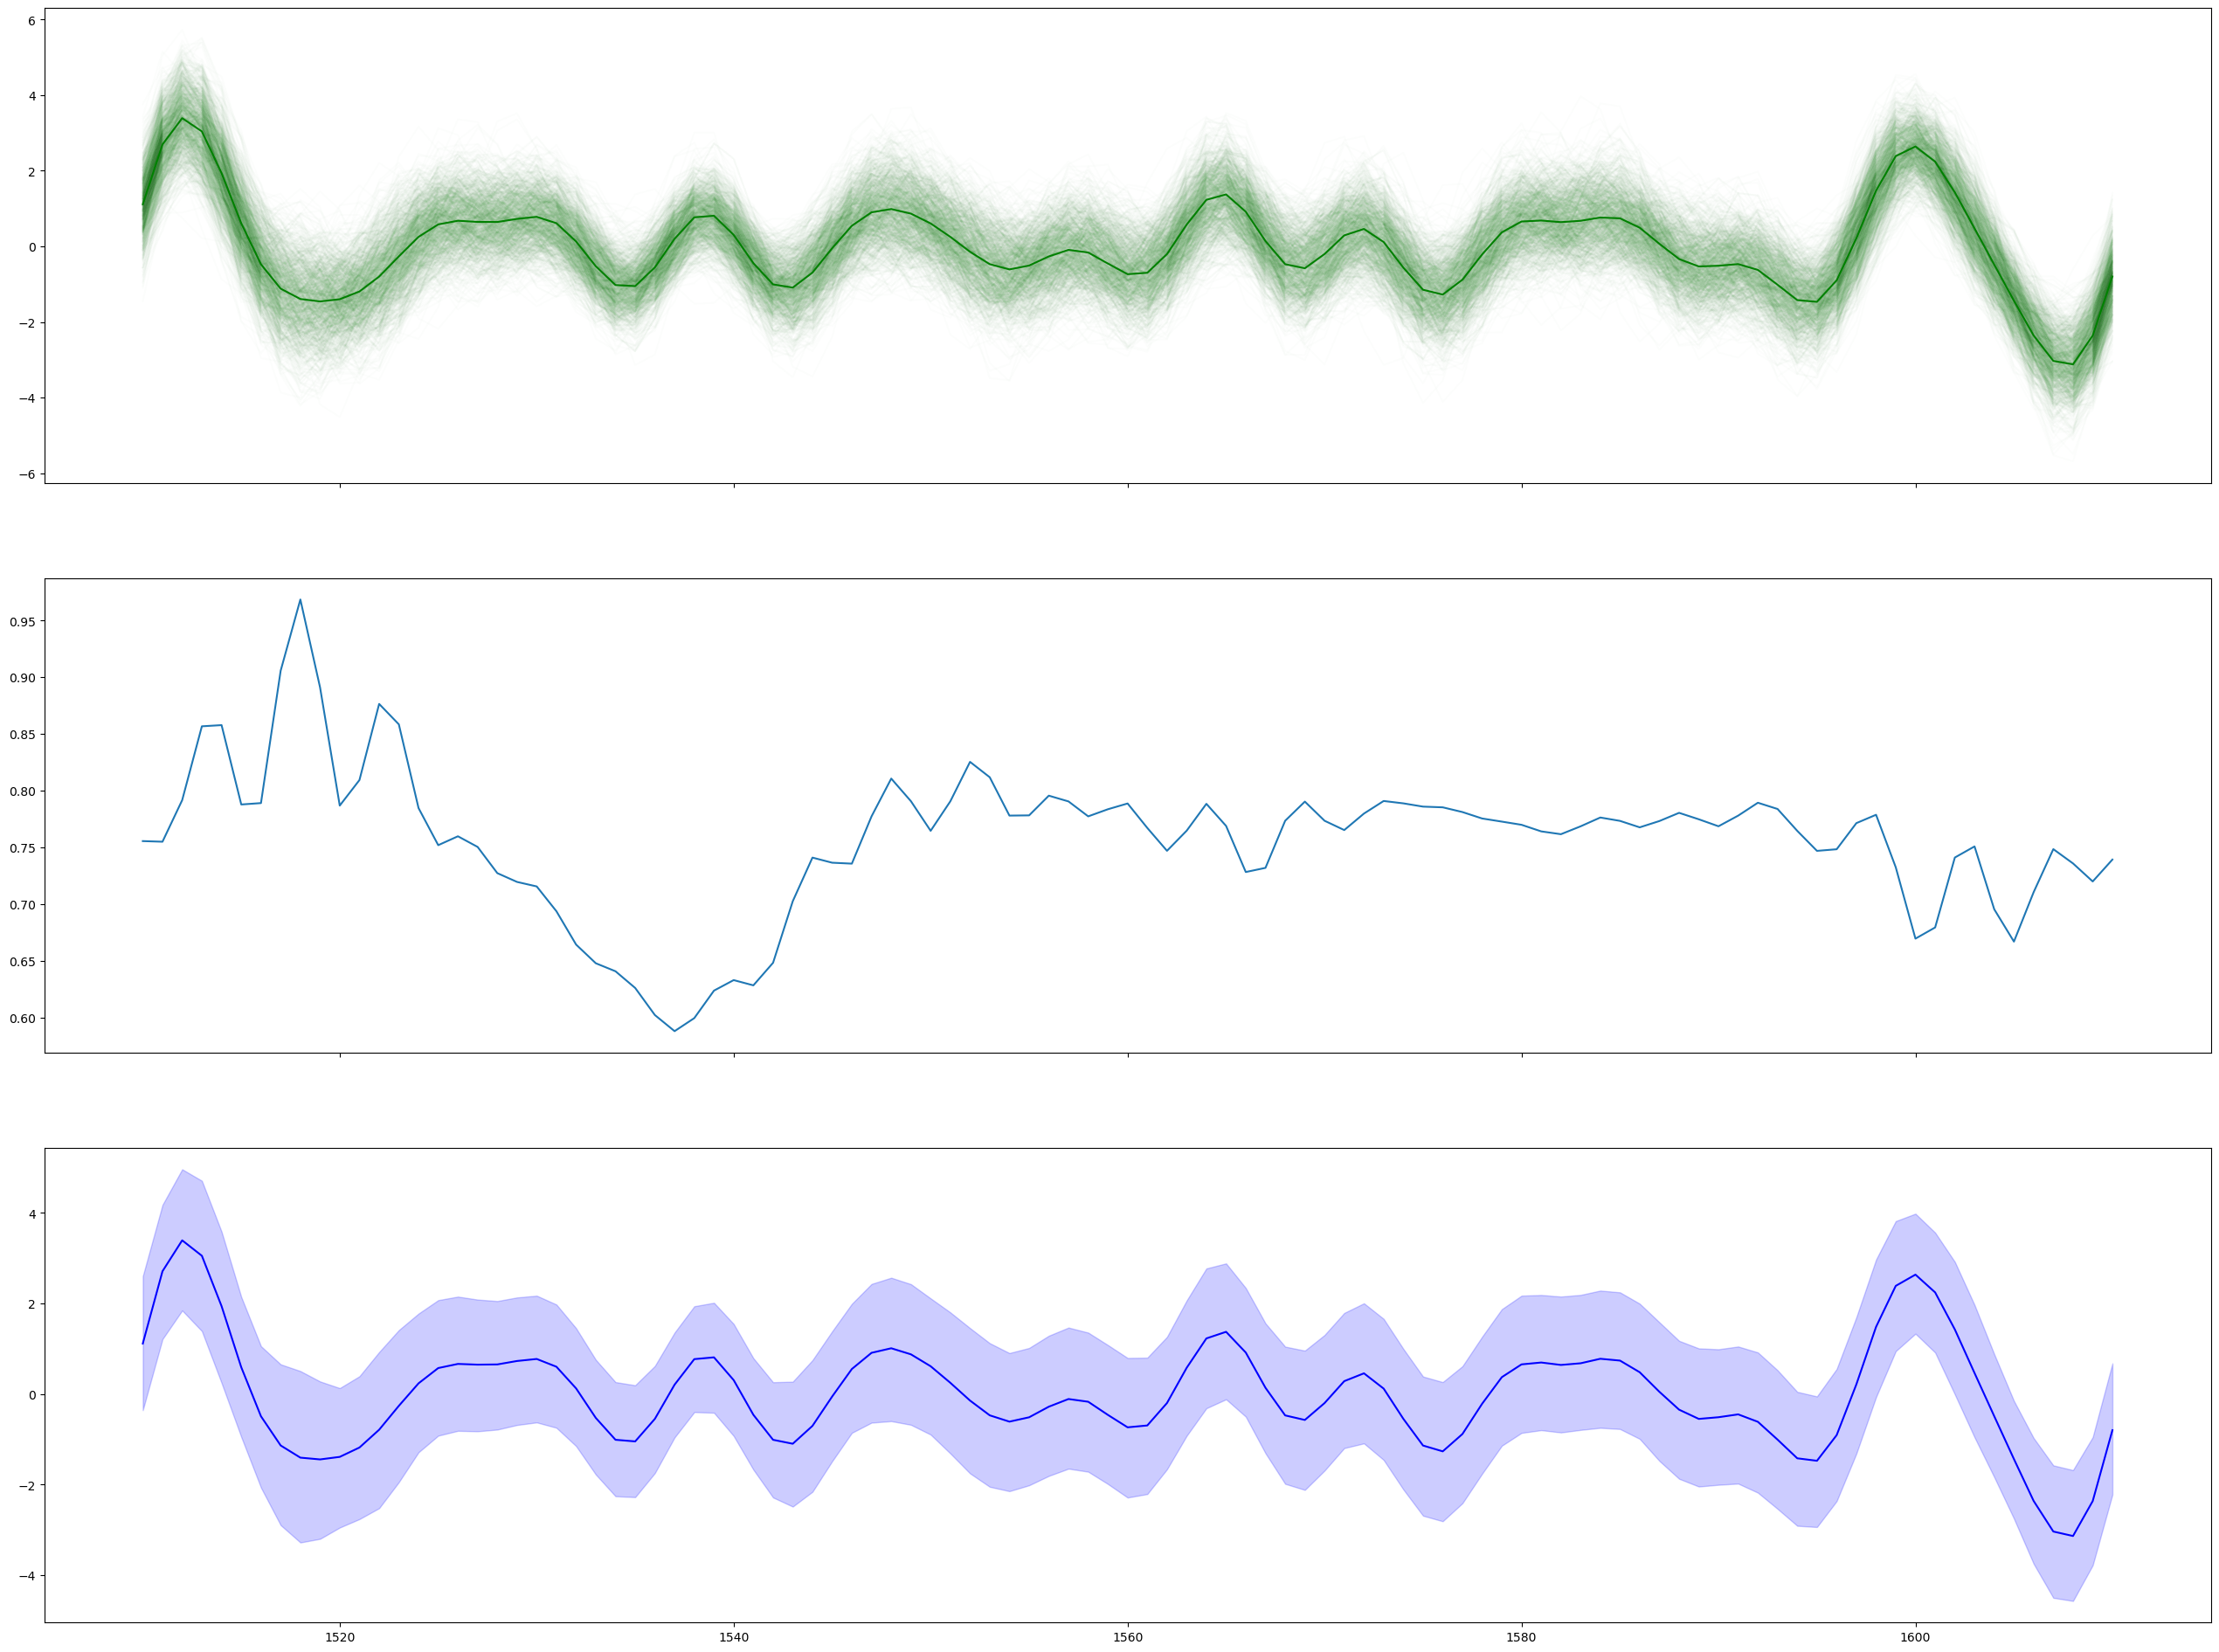

In [9]:
fig, axs = plt.subplots(3, figsize=(32, 24), sharex=True)
for i in np.random.randint(10000, size=1000):
    axs[0].plot(resampler.annual, new_signal[i, :], color="g", alpha=0.01)
axs[0].plot(resampler.annual, sig, color="g")
axs[1].plot(resampler.annual, np.std(new_signal, axis=0))
l, m, u = np.percentile(new_signal, (2.5, 50, 97.5 ), axis=0)
axs[2].fill_between(resampler.annual, l, u, color = 'b', alpha=0.2)
axs[2].plot(resampler.annual, m, color = 'b')